In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index and display the first five rows
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [4]:
# Question 2: Extract Tesla Revenue Data

# Fetch Tesla annual revenue data
tesla_financials = tesla.financials
if "Total Revenue" in tesla_financials.index:
    tesla_revenue = tesla_financials.loc["Total Revenue"].reset_index()
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
    tesla_revenue = tesla_revenue.sort_values("Date")
    
    print(tesla_revenue.tail())
else:
    print("Total Revenue data not found in the financials.")

        Date        Revenue
4 2019-12-31            NaN
3 2020-12-31  31536000000.0
2 2021-12-31  53823000000.0
1 2022-12-31  81462000000.0
0 2023-12-31  96773000000.0


In [5]:
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index and display the first five rows
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
# Fetch GameStop quarterly revenue data
gme_quarterly_revenue = gme.quarterly_financials.loc["Total Revenue"]
gme_revenue = pd.DataFrame(gme_quarterly_revenue).reset_index()
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue = gme_revenue.sort_values("Date")

print(gme_revenue.tail())

        Date       Revenue
4 2023-01-31  2226400000.0
3 2023-04-30  1237100000.0
2 2023-07-31  1163800000.0
1 2023-10-31  1078300000.0
0 2024-01-31  1793600000.0


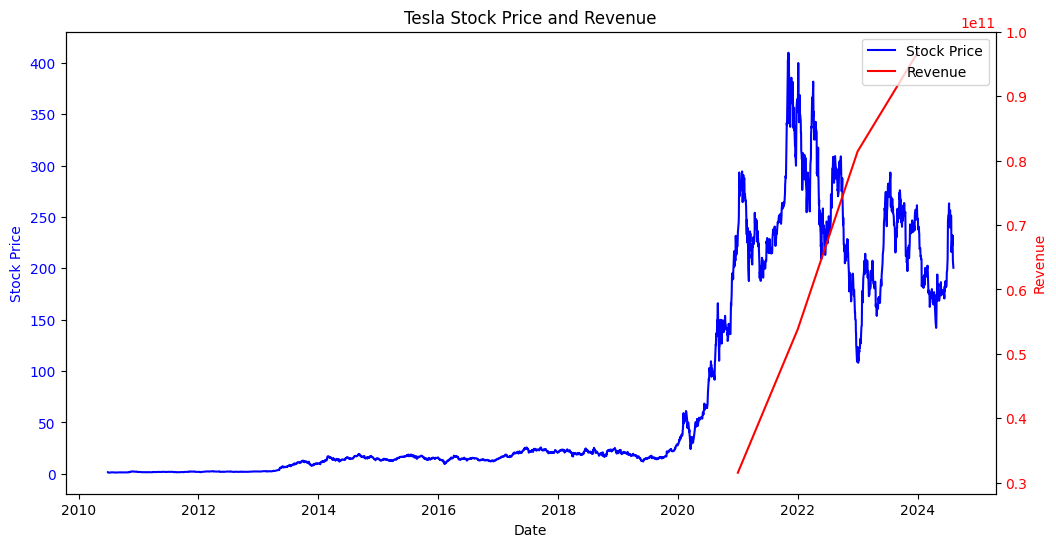

In [8]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 'r-', label='Revenue')
    ax2.set_ylabel('Revenue', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Set title and display legend
    plt.title(f"{stock} Stock Price and Revenue")
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    plt.show()

# Make sure tesla_data and tesla_revenue are defined from previous questions
make_graph(tesla_data, tesla_revenue, 'Tesla')

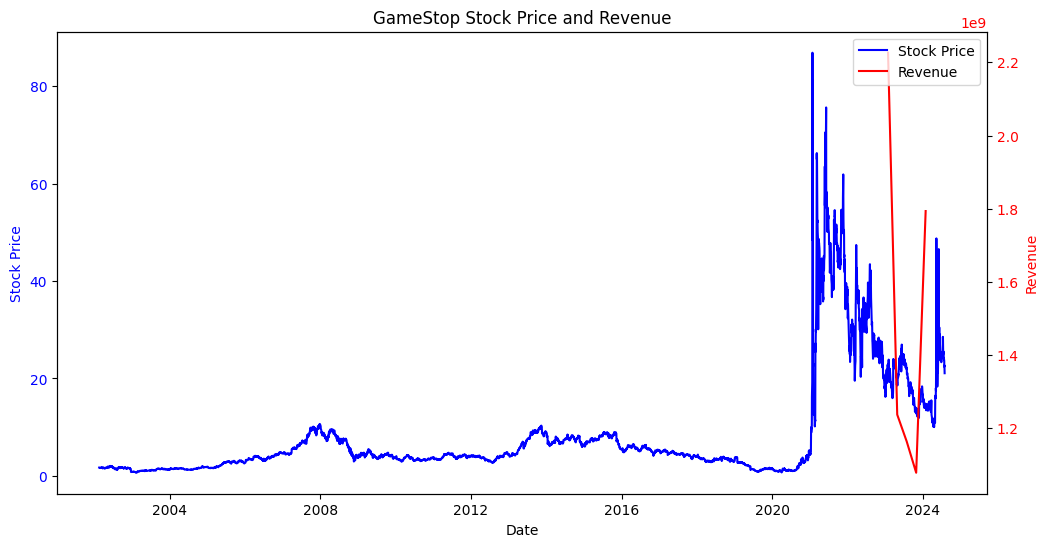

In [9]:
make_graph(gme_data, gme_revenue, 'GameStop')